In [40]:
import pandas as pd 
import plotly.express as px  
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import matplotlib.animation as animation
import matplotlib
import matplotlib.ticker as tick
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns; sns.set(style='white')
from scipy.stats import pearsonr

In [72]:
places_df = pd.read_csv('data/clean_mobility_data.csv')
places_df.head()
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [42]:
#this doesn't really make sense to do because we haven't idenfied an independent variable. Also the groups have to be groups or two thingies, right? 

#make a cases dataframe
#we are using state by state data here and that is not exactly what we want, now is it?  That was really dumb of you to pull this and spend so much time getting it working when it was not going to be in the final thingy, huh? 

nationwide_df = places_df[places_df['sub_region_1'].isnull()]

raw_cases_df = pd.read_csv('data/nationwide_cases.csv')

date = pd.to_datetime(raw_cases_df['date'], format="%Y/%m/%d")
raw_cases_df['date'] = date

date = pd.to_datetime(nationwide_df['date'], format="%Y/%m/%d")
nationwide_df['date'] = date

cases_df = pd.merge(nationwide_df, raw_cases_df, on=['date'])

cases = cases_df['cases']
retail = cases_df['retail_and_recreation_percent_change_from_baseline']
grocery = cases_df['grocery_and_pharmacy_percent_change_from_baseline']
parks = cases_df['parks_percent_change_from_baseline']
transit = cases_df['transit_stations_percent_change_from_baseline']
wrokplace = cases_df['workplaces_percent_change_from_baseline']
home = cases_df['residential_percent_change_from_baseline']

stats.f_oneway(cases, retail, grocery, parks, transit, wrokplace, home)


F_onewayResult(statistic=462.39777712696065, pvalue=0.0)

In [43]:
state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

#PRINTS A GRAPH FOR EVERY STATE. 

# for state in state_names:
#     graph_df = places_df[(places_df['sub_region_1'] == state) & (places_df['sub_region_2'].isnull())]

#     plt.figure(figsize=(5, 2.5))
#     plt.plot(graph_df['date'], graph_df['grocery_and_pharmacy_percent_change_from_baseline'])
#     plt.title(state)
#     plt.show()

In [44]:
#TODO do an ANOVA and also get some line graphs for significant states. also get a multiline graph for each of the columns. Talk about what is interesting about those graphs. why did we make them etc. 

#TODO lit review. 

#TODO bin rural and urban data with same population sizes. That would be cool. 

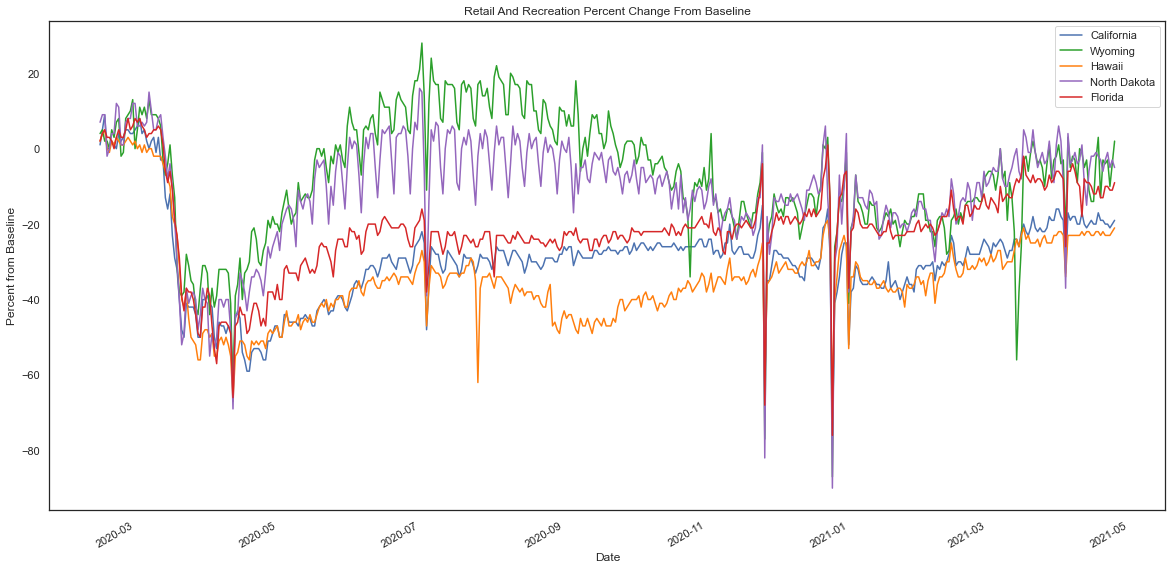

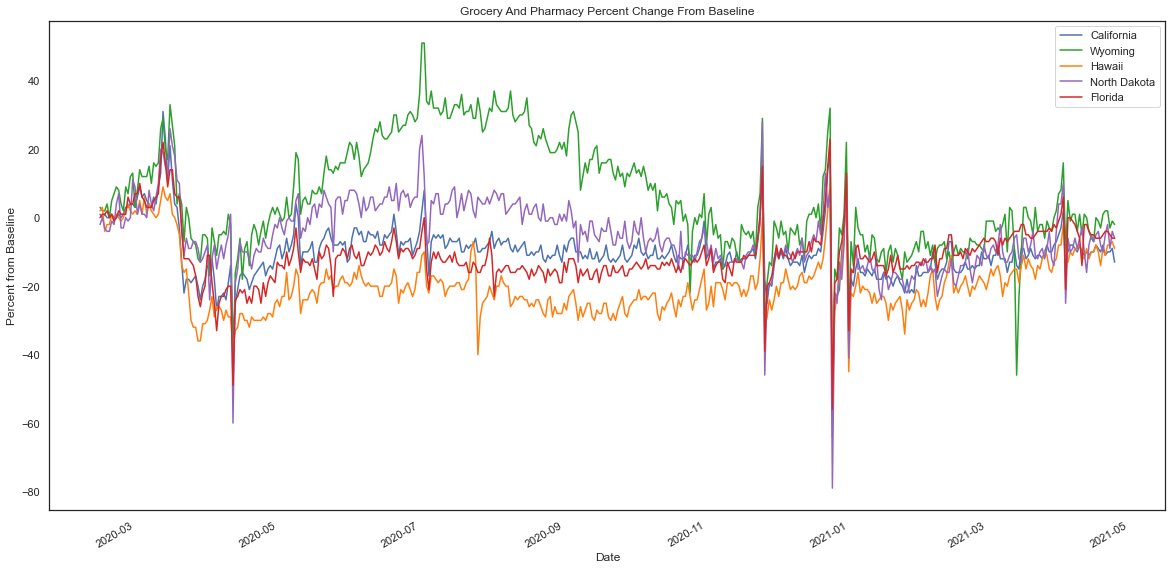

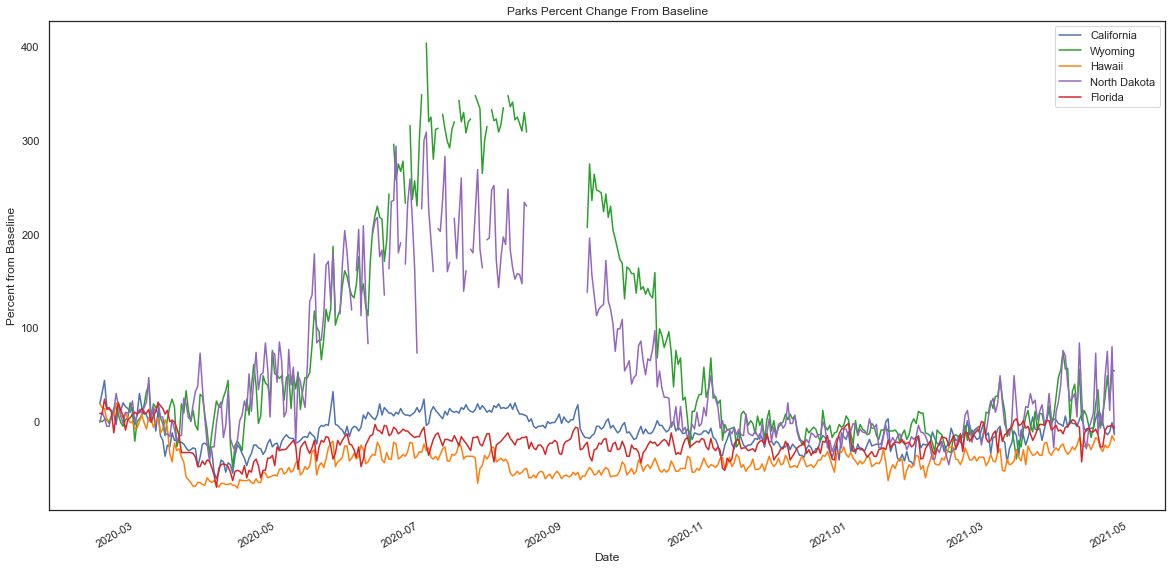

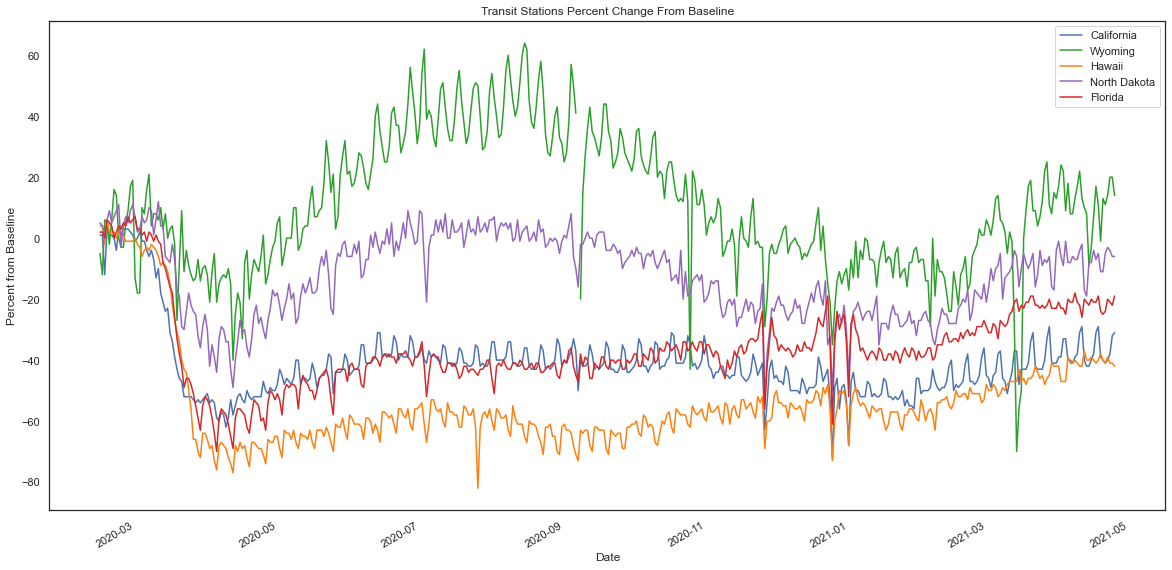

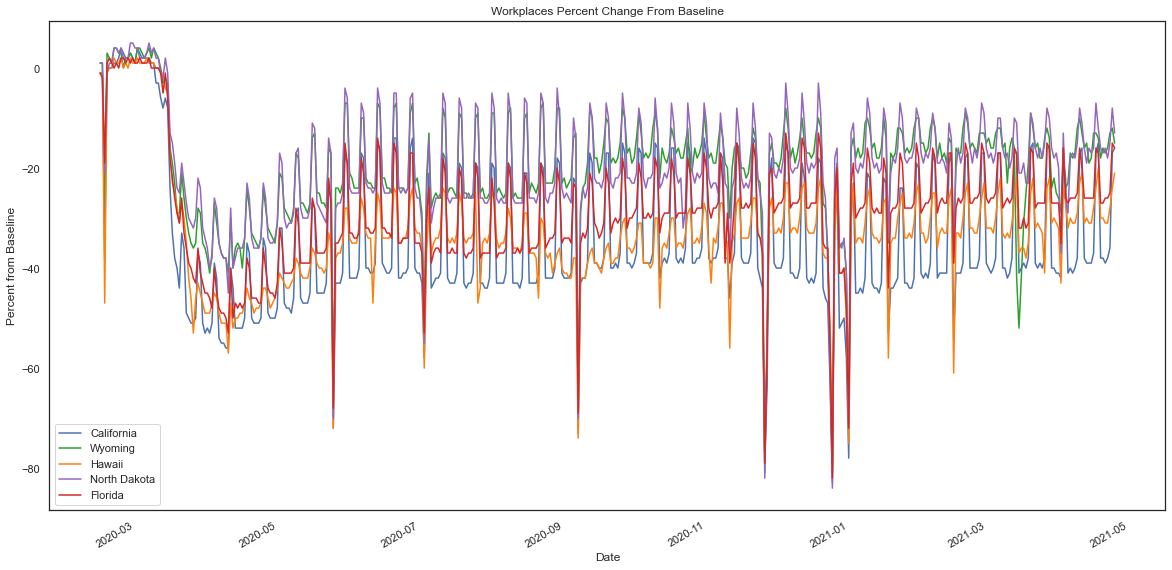

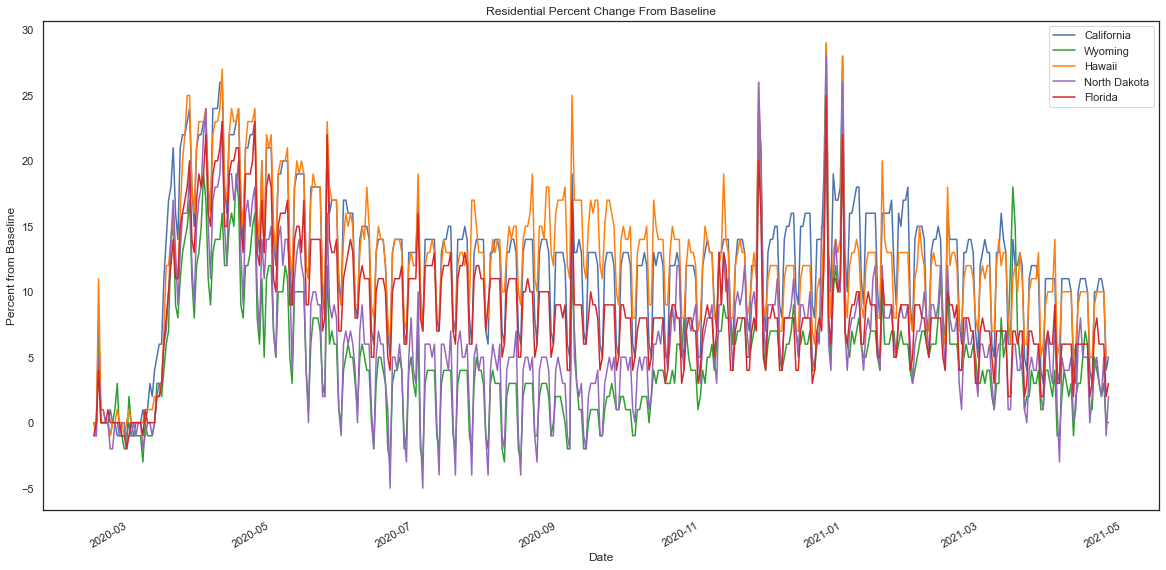

In [71]:
date2 = pd.to_datetime(places_df['date'], format="%Y/%m/%d")
places_df['date'] = date2
#function to format dates
def x_axis_dates(ax=None, fig=None):
   
    if ax is None: ax = plt.gca()
    if fig is None: fig = plt.gcf()
    loc = mdates.AutoDateLocator()
    fmt = mdates.AutoDateFormatter(loc)
    try:
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_major_formatter(fmt)
    except AttributeError:
        for a in ax:
            # Fresh locators/formatters are needed for each instance
            loc = mdates.AutoDateLocator()
            fmt = mdates.AutoDateFormatter(loc)
            a.xaxis.set_major_locator(loc)
            a.xaxis.set_major_formatter(fmt)
    fig.autofmt_xdate()

#make state dataframes
cali_df = places_df[(places_df['sub_region_1'] == 'California') & (places_df['sub_region_2'].isnull())]
wyoming_df = places_df[(places_df['sub_region_1'] == 'Wyoming') & (places_df['sub_region_2'].isnull())]
hawaii_df = places_df[(places_df['sub_region_1'] == 'Hawaii') & (places_df['sub_region_2'].isnull())]
dakota_df = places_df[(places_df['sub_region_1'] == 'North Dakota') & (places_df['sub_region_2'].isnull())]
florida_df = places_df[(places_df['sub_region_1'] == 'Florida') & (places_df['sub_region_2'].isnull())]


#plotting interesting states against one another for all variables
columns = ['retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline']

for column in columns:
    plt.figure(figsize=(20, 10))
    plt.plot(cali_df['date'], cali_df[column])
    plt.plot(wyoming_df['date'], wyoming_df[column], color='tab:green')
    plt.plot(hawaii_df['date'], hawaii_df[column], color='tab:orange')
    plt.plot(dakota_df['date'], dakota_df[column], color='tab:purple')
    plt.plot(florida_df['date'], florida_df[column], color='tab:red')

    labels= ['California', 'Wyoming', 'Hawaii', 'North Dakota', 'Florida']
    #format the new plot
    title = column.replace('_', ' ').title()  # formatting the column names so they are't super ugly graph names. 
    plt.title(f'{title}')
    plt.xlabel('Date')
    # Set the y axis label of the current axis.
    plt.ylabel('Percent from Baseline')
    plt.xticks(rotation=45)
    # show a legend on the plot
    plt.legend(labels=labels)
    x_axis_dates()

    plt.show()


In [86]:
raw_states_df = places_df[places_df['sub_region_1'].notnull() & places_df['sub_region_2'].isnull()]

raw_states_cases_df = pd.read_csv('data/nyt_state_data.csv')

date = pd.to_datetime(raw_states_df['date'], format="%Y/%m/%d")
raw_states_df['date'] = date

date = pd.to_datetime(raw_states_cases_df['date'], format="%Y/%m/%d")
raw_states_cases_df['date'] = date

raw_states_cases_df['sub_region_1'] = raw_states_cases_df['state']

states_df = pd.merge(raw_states_cases_df, raw_states_df, on=['date', 'sub_region_1'])

#this code grabs state abbrivations, which is a requirement for the choropleth function
all_states = states_df['sub_region_1']
state_abbrev = []
for state in all_states:
    state_abbrev.append(us_state_abbrev[state])
states_df['state'] = state_abbrev

fig = px.choropleth(states_df,  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color_continuous_scale="Viridis",
                    range_color=(-20, 12),
                    color="retail_and_recreation_percent_change_from_baseline",  # DataFrame column with color values
                    hover_name="retail_and_recreation_percent_change_from_baseline", # DataFrame column hover info
                    locationmode = 'USA-states',
                    labels={'retail_and_recreation_percent_change_from_baseline':'Retail Visits'}) # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show() # Output the plot to the screen
